<a href="https://colab.research.google.com/github/wel51x/DS-Sprint-01-Dealing-With-Data/blob/master/Winston_Lee_LS_DS_222_Assignment_Choose_appropriate_visualizations_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Financial Times Visual Vocabulary poster](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Seaborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [2]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-01-22 22:37:09--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py’

misleading.py       100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-01-22 22:37:09 (233 MB/s) - ‘misleading.py’ saved [1258/1258]



### Fix misleading plot #1

Plot mkt share auto US

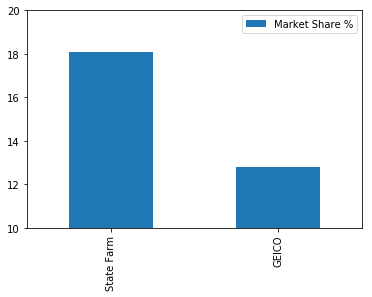

In [0]:
misleading.plot1();

In [0]:
misleading??

            Market Share %
State Farm           18.07
GEICO                12.79


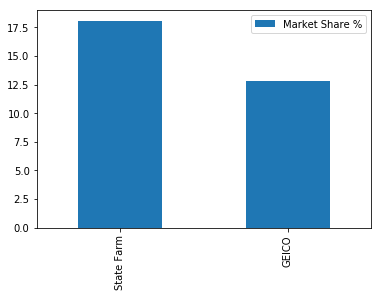

In [0]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})
print(insurance)
insurance.plot.bar()

### Fix misleading plot #2

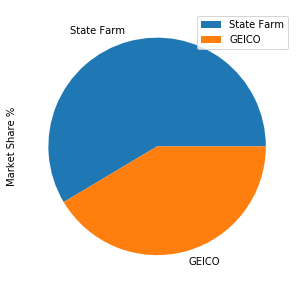

In [0]:
misleading.plot2();

In [0]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO', 'Other'], 
    data={'Market Share %': [18.07, 12.79, 100 - 18.07 - 12.79]})
print(insurance)

            Market Share %
State Farm           18.07
GEICO                12.79
Other                69.14


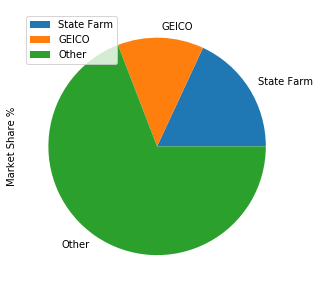

In [0]:
insurance.plot.pie('Market Share %', figsize=(5, 5))

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [0]:
misleading.plot3()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [0]:
# Based on https://altair-viz.github.io/gallery/choropleth_repeat.html
import altair as alt
from vega_datasets import data

url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'

In [0]:
# Load the State Farm data
df = pd.read_csv(url)

df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
variable = 'State Farm policy premiums'

In [0]:
# Calculate market share percentage by state

df['State Farm market share %'] = (
    df['State Farm policy premiums'] / 
    df['STATE TOTAL'])

In [0]:
# And then map State Farm market share % instead of State Farm policy premiums
variable = 'State Farm market share %'

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm market share %',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATHA

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [0]:
df.shape

(44, 3)

### See the data

In [0]:
df.sample(12)

,dataset,x,y
32,III,5.0,5.73
41,IV,8.0,5.56
17,II,6.0,6.13
0,I,10.0,8.04
38,IV,8.0,7.04
34,IV,8.0,5.76
23,III,8.0,6.77
2,I,13.0,7.58
18,II,4.0,3.10
7,I,4.0,4.26


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [0]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [0]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [0]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [0]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [0]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

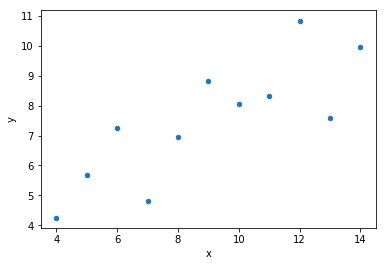

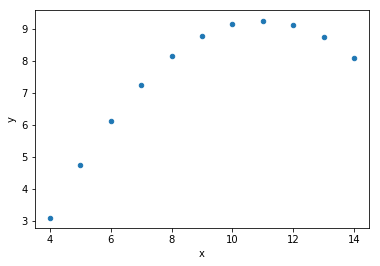

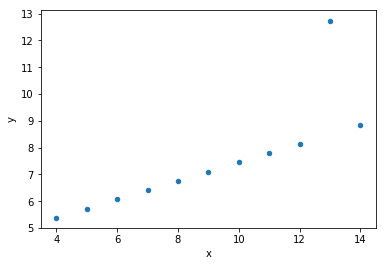

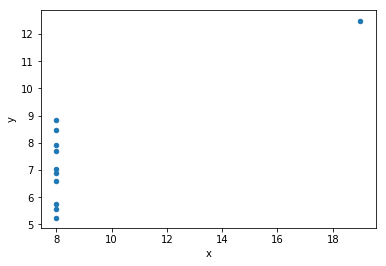

In [0]:
groups.plot('x', 'y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

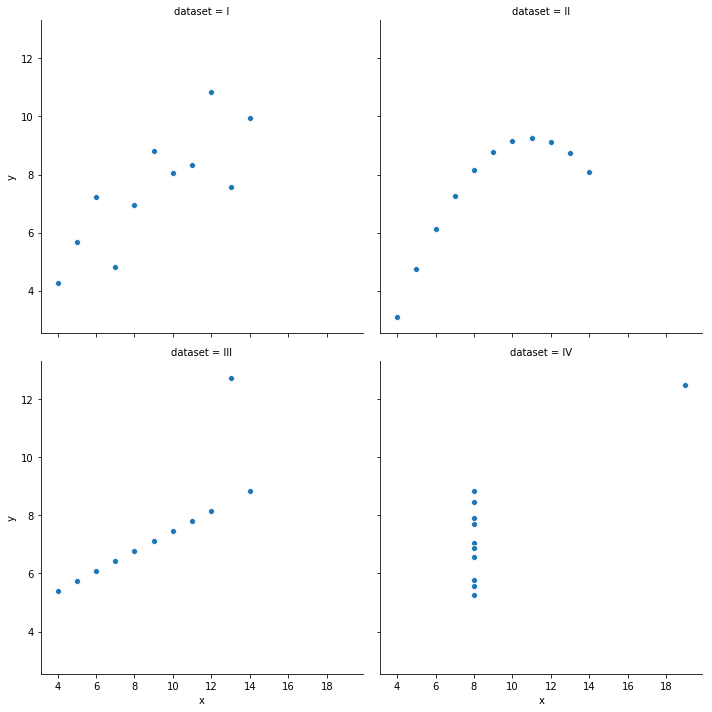

In [0]:
sns.relplot('x', 'y', col='dataset', data=df, col_wrap=2);

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

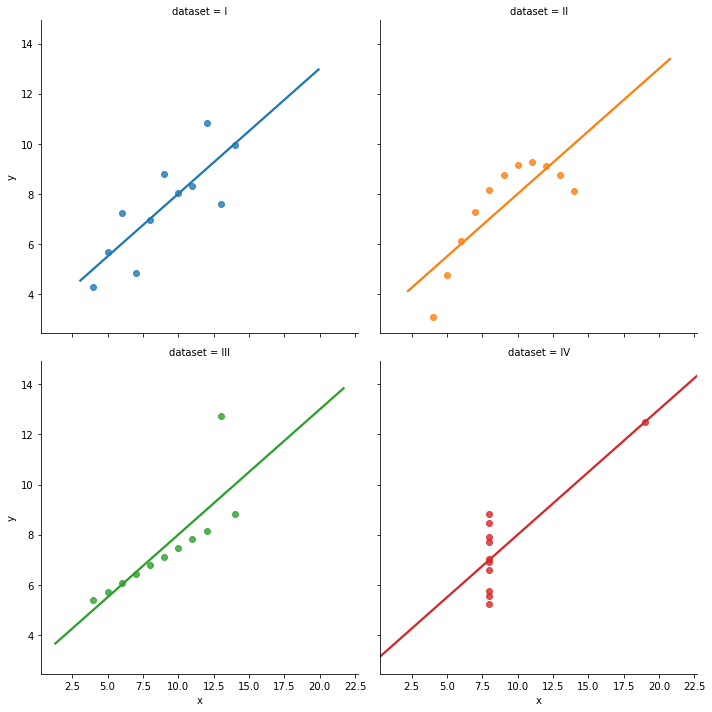

In [0]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', col_wrap=2, ci=None, data=df);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [0]:
tips.shape

(244, 7)

### See the first 5 rows

In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [0]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [0]:
tips.describe(exclude=np.number)

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

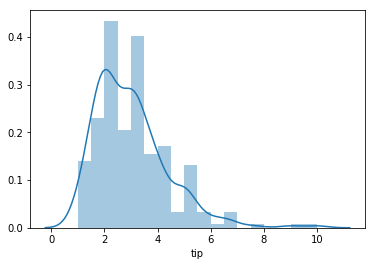

In [0]:
sns.distplot(tips['tip']);

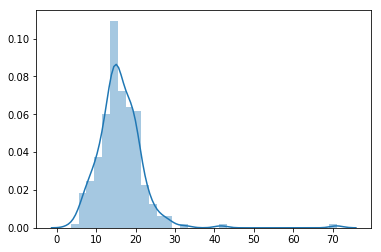

In [0]:
tips['tips_percent'] = (tips.tip / tips.total_bill) * 100
sns.distplot(tips_percent);

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

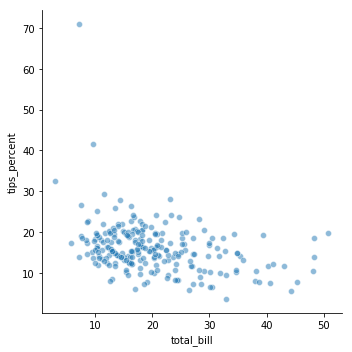

In [0]:
sns.relplot(x='total_bill', y='tips_percent', data=tips, alpha=0.5);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

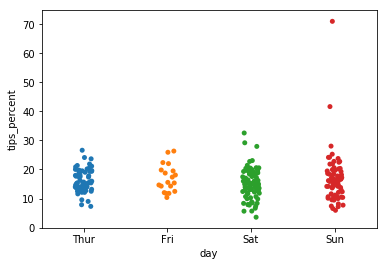

In [0]:
sns.stripplot(x='day', y='tips_percent', data=tips, jitter=True);

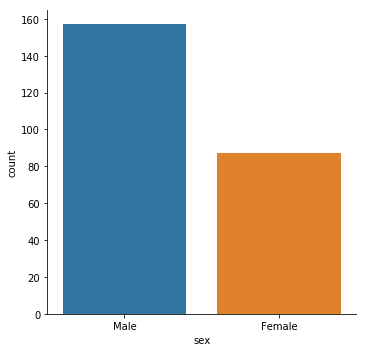

In [0]:
sns.catplot(x='sex', data=tips, kind='count');

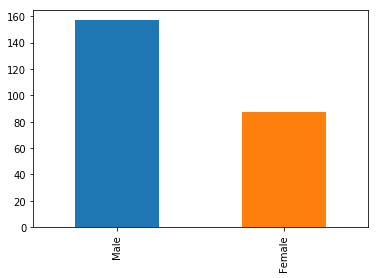

In [0]:
tips.sex.value_counts().plot.bar();

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

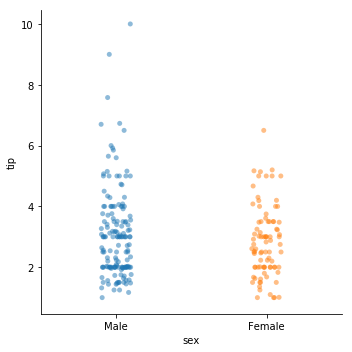

In [0]:
sns.catplot(x='sex', y='tip', data=tips, kind='strip', alpha=0.5);

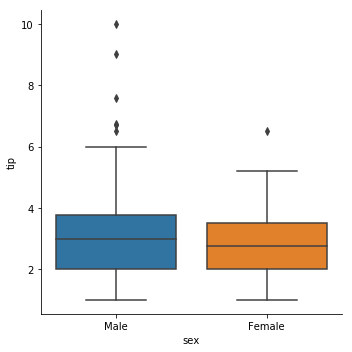

In [0]:
sns.catplot(x='sex', y='tip', data=tips, kind='box');

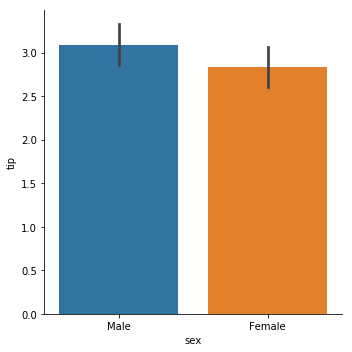

In [0]:
sns.catplot(x='sex', y='tip', data=tips, kind='bar');

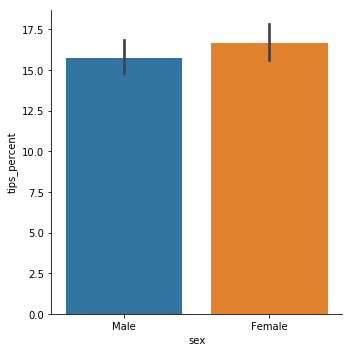

In [0]:
sns.catplot(x='sex', y='tips_percent', data=tips, kind='bar');

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [6]:
flights.shape

(144, 3)

### See the first 5 rows

In [7]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [8]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

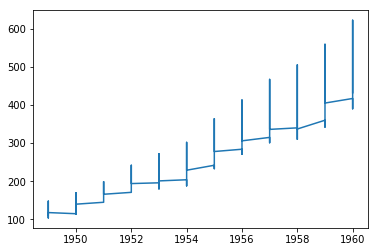

In [9]:
plt.plot(flights.year, flights.passengers);

### Plot month & passengers

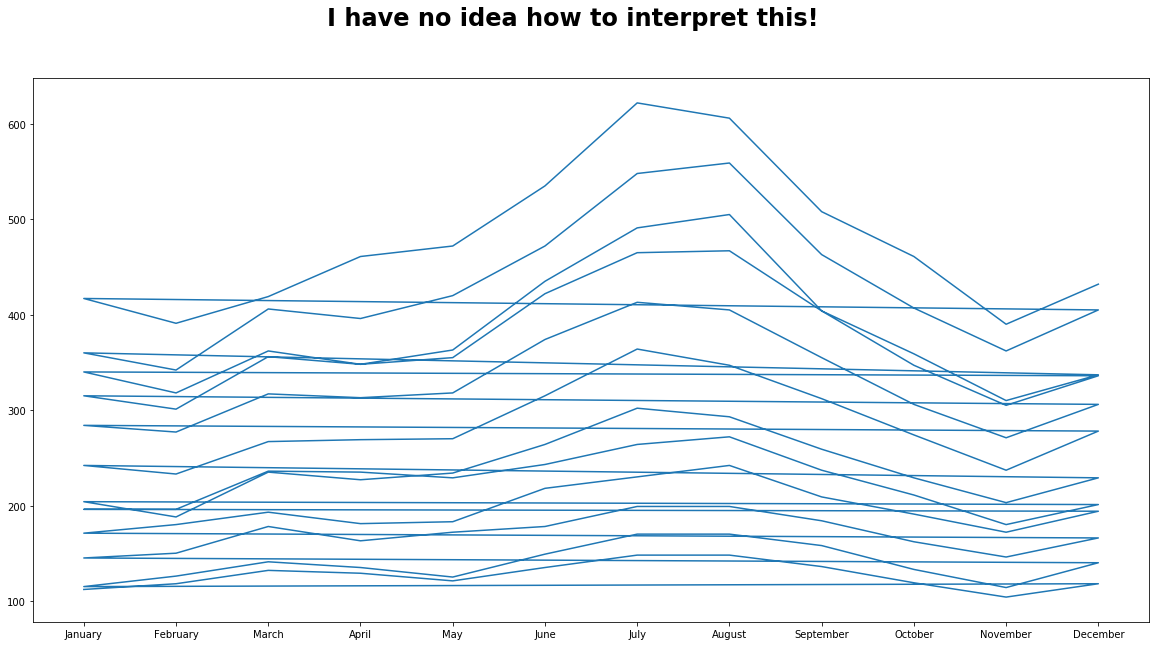

In [14]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("I have no idea how to interpret this!", fontsize=24, fontweight='heavy')
plt.plot(list(flights.month), flights.passengers);

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [0]:
flights_pt = flights.pivot_table(index='month', columns='year')

### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

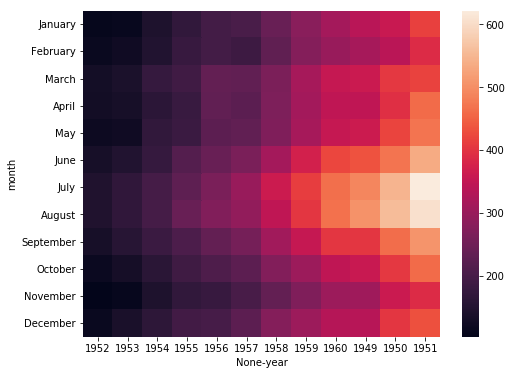

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(flights_pt, xticklabels = list(set(flights['year'])));

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

==>> See above

### 2.

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) Experiment and make changes.

Take notes. Share your work with your cohort!


In [0]:
import altair as alt
from vega_datasets import data

source = data.disasters.url
df = pd.read_csv(source)
df = df[df['Year'] < 1960]
df.sample(11)

,Entity,Year,Deaths
708,Volcanic activity,1914,140
25,All natural disasters,1926,427852
710,Volcanic activity,1926,144
2,All natural disasters,1902,46037
192,Earthquake,1943,4332
4,All natural disasters,1905,22758
509,Flood,1927,3246
33,All natural disasters,1934,21087
187,Earthquake,1938,166
269,Epidemic,1907,1300000


In [0]:
alt.Chart(df).mark_circle(opacity=0.75,
                              stroke='black',
                              strokeWidth=1)\
                 .encode(alt.X('Year:O', axis=alt.Axis(labelAngle=0)),
                         alt.Y('Entity:N'),
                         alt.Size('Deaths:Q',
                         scale=alt.Scale(range=[0, 5000]),
                         legend=alt.Legend(title='Annual Global Deaths')),
                         alt.Color('Entity:N', legend=None))\
                 .properties(width=480,
                             height=350)\
                 .transform_filter(alt.datum.Entity != 'All natural disasters')

Chart({
  data:                     Entity  Year   Deaths
  0    All natural disasters  1900  1267360
  1    All natural disasters  1901   200018
  2    All natural disasters  1902    46037
  3    All natural disasters  1903     6506
  4    All natural disasters  1905    22758
  5    All natural disasters  1906    42970
  6    All natural disasters  1907  1325641
  7    All natural disasters  1908    75033
  8    All natural disasters  1909  1511524
  9    All natural disasters  1910   148233
  10   All natural disasters  1911   102408
  11   All natural disasters  1912    52093
  12   All natural disasters  1913      882
  13   All natural disasters  1914      289
  14   All natural disasters  1915    32167
  15   All natural disasters  1916      300
  16   All natural disasters  1917  2523507
  17   All natural disasters  1918   461113
  18   All natural disasters  1919     5500
  19   All natural disasters  1920  3204224
  20   All natural disasters  1921  1200000
  21   All natural disasters  1922   101243
  22   All natural disasters  1923   255701
  23   All natural disasters  1924   303009
  24   All natural disasters  1925     5832
  25   All natural disasters  1926   427852
  26   All natural disasters  1927   215160
  27   All natural disasters  1928  3004895
  28   All natural disasters  1929     8377
  29   All natural disasters  1930    10572
  ..                     ...   ...      ...
  676    Mass movement (dry)  1955        3
  702      Volcanic activity  1900       30
  703      Volcanic activity  1902    38690
  704      Volcanic activity  1903       17
  705      Volcanic activity  1906      700
  706      Volcanic activity  1909     5500
  707      Volcanic activity  1911     1335
  708      Volcanic activity  1914      140
  709      Volcanic activity  1919     5000
  710      Volcanic activity  1926      144
  711      Volcanic activity  1929     5000
  712      Volcanic activity  1930     1369
  713      Volcanic activity  1931     1300
  714      Volcanic activity  1937      506
  715      Volcanic activity  1944       26
  716      Volcanic activity  1948      100
  717      Volcanic activity  1949     2000
  718      Volcanic activity  1950       84
  719      Volcanic activity  1951     4800
  720      Volcanic activity  1952       29
  721      Volcanic activity  1953      150
  722      Volcanic activity  1954       37
  755               Wildfire  1911       73
  756               Wildfire  1918     1000
  757               Wildfire  1922       43
  758               Wildfire  1929       60
  759               Wildfire  1939       71
  760               Wildfire  1944      170
  761               Wildfire  1949       80
  762               Wildfire  1956       11
  
  [283 rows x 3 columns],
  encoding: EncodingWithFacet({
    color: Color({
      legend: None,
      shorthand: 'Entity:N'
    }),
    size: Size({
      legend: Legend({
        title: 'Annual Global Deaths'
      }),
      scale: Scale({
        range: [0, 5000]
      }),
      shorthand: 'Deaths:Q'
    }),
    x: X({
      axis: Axis({
        labelAngle: 0
      }),
      shorthand: 'Year:O'
    }),
    y: Y({
      shorthand: 'Entity:N'
    })
  }),
  height: 350,
  mark: MarkDef({
    opacity: 0.75,
    stroke: 'black',
    strokeWidth: 1,
    type: 'circle'
  }),
  transform: [FilterTransform({
    filter: (datum.Entity !== 'All natural disasters')
  })],
  width: 480
})

In [0]:
source = data.disasters.url
df = pd.read_csv(source)
df = df[df['Year'] > 1959]

In [0]:
alt.Chart(df).mark_circle(opacity=0.75,
                              stroke='black',
                              strokeWidth=1)\
                 .encode(alt.X('Year:O', axis=alt.Axis(labelAngle=0)),
                         alt.Y('Entity:N'),
                         alt.Size('Deaths:Q',
                         scale=alt.Scale(range=[0, 5000]),
                         legend=alt.Legend(title='Annual Global Deaths')),
                         alt.Color('Entity:N', legend=None))\
                 .properties(width=480,
                             height=350)\
                 .transform_filter(alt.datum.Entity != 'All natural disasters')

Chart({
  data:                     Entity  Year   Deaths
  59   All natural disasters  1960    39188
  60   All natural disasters  1961    17341
  61   All natural disasters  1962    17370
  62   All natural disasters  1963    37746
  63   All natural disasters  1964    12892
  64   All natural disasters  1965  1565517
  65   All natural disasters  1966    17181
  66   All natural disasters  1967    10103
  67   All natural disasters  1968    21461
  68   All natural disasters  1969    11687
  69   All natural disasters  1970   387507
  70   All natural disasters  1971    18086
  71   All natural disasters  1972    20045
  72   All natural disasters  1973   110555
  73   All natural disasters  1974    87504
  74   All natural disasters  1975    14858
  75   All natural disasters  1976   280469
  76   All natural disasters  1977    22406
  77   All natural disasters  1978    38096
  78   All natural disasters  1979     7341
  79   All natural disasters  1980    23089
  80   All natural disasters  1981   119697
  81   All natural disasters  1982    13973
  82   All natural disasters  1983   461561
  83   All natural disasters  1984    16273
  84   All natural disasters  1985    60232
  85   All natural disasters  1986    10349
  86   All natural disasters  1987    21533
  87   All natural disasters  1988    57464
  88   All natural disasters  1989    12611
  ..                     ...   ...      ...
  773               Wildfire  1986       20
  774               Wildfire  1987      191
  775               Wildfire  1989        1
  776               Wildfire  1991       90
  777               Wildfire  1992      122
  778               Wildfire  1993        3
  779               Wildfire  1994       84
  780               Wildfire  1995       29
  781               Wildfire  1996       45
  782               Wildfire  1997      266
  783               Wildfire  1998      150
  784               Wildfire  1999       70
  785               Wildfire  2000       47
  786               Wildfire  2001       33
  787               Wildfire  2002        6
  788               Wildfire  2003       47
  789               Wildfire  2004       14
  790               Wildfire  2005       45
  791               Wildfire  2006       13
  792               Wildfire  2007      148
  793               Wildfire  2008       86
  794               Wildfire  2009      190
  795               Wildfire  2010      166
  796               Wildfire  2011       10
  797               Wildfire  2012       21
  798               Wildfire  2013       35
  799               Wildfire  2014       16
  800               Wildfire  2015       67
  801               Wildfire  2016       39
  802               Wildfire  2017       75
  
  [520 rows x 3 columns],
  encoding: EncodingWithFacet({
    color: Color({
      legend: None,
      shorthand: 'Entity:N'
    }),
    size: Size({
      legend: Legend({
        title: 'Annual Global Deaths'
      }),
      scale: Scale({
        range: [0, 5000]
      }),
      shorthand: 'Deaths:Q'
    }),
    x: X({
      axis: Axis({
        labelAngle: 0
      }),
      shorthand: 'Year:O'
    }),
    y: Y({
      shorthand: 'Entity:N'
    })
  }),
  height: 350,
  mark: MarkDef({
    opacity: 0.75,
    stroke: 'black',
    strokeWidth: 1,
    type: 'circle'
  }),
  transform: [FilterTransform({
    filter: (datum.Entity !== 'All natural disasters')
  })],
  width: 480
})